In [34]:
import arcpy
from glob import glob

In [ ]:
def create_kml_from_utm(coordinates, output_folder, kml_name="polygon.kml", utm_zone=17, hemisphere="S"):
    """
    Creates a KML file from given UTM coordinates.

    Parameters:
    - coordinates: List of (X, Y) tuples representing UTM coordinates.
    - output_folder: Path to the folder where the KML will be saved.
    - kml_name: Name of the output KML file (default: "polygon.kml").
    - utm_zone: UTM Zone number (default: 17).
    - hemisphere: "N" for North or "S" for South (default: "S" for Southern Hemisphere").

    Returns:
    - Path to the created KML file.
    """

    # Select correct EPSG code based on hemisphere
    epsg_code = 32600 + utm_zone if hemisphere.upper() == "N" else 32700 + utm_zone
    spatial_ref_utm = arcpy.SpatialReference(epsg_code)
    spatial_ref_wgs84 = arcpy.SpatialReference(4326)  # KML requires WGS 84 (EPSG: 4326)

    # Ensure the polygon is closed
    if coordinates[0] != coordinates[-1]:
        coordinates.append(coordinates[0])  # Closing the polygon

    # Create Polygon Geometry
    polygon = arcpy.Polygon(arcpy.Array([arcpy.Point(x, y) for x, y in coordinates]), spatial_ref_utm)

    # Define output paths
    temp_gdb = os.path.join(output_folder, "temp.gdb")
    polygon_fc = os.path.join(temp_gdb, "PolygonFeature")
    kml_path = os.path.join(output_folder, kml_name)

    # Ensure output folder and geodatabase exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    if not arcpy.Exists(temp_gdb):
        arcpy.CreateFileGDB_management(output_folder, "temp.gdb")

    # Create Feature Class to store the polygon
    arcpy.CreateFeatureclass_management(temp_gdb, "PolygonFeature", "POLYGON", spatial_reference=spatial_ref_utm)

    # Insert the polygon into the feature class
    with arcpy.da.InsertCursor(polygon_fc, ["SHAPE@"]) as cursor:
        cursor.insertRow([polygon])

    # Project the feature class to WGS 84 (for KML compatibility)
    projected_fc = os.path.join(temp_gdb, "PolygonProjected")
    arcpy.Project_management(polygon_fc, projected_fc, spatial_ref_wgs84)

    # Export the projected polygon to KML
    arcpy.LayerToKML_conversion(projected_fc, kml_path)

    print(f"KML file created successfully at: {kml_path}")
    return kml_path

In [10]:
# Define the spatial reference for UTM Zone 17S
spatial_ref = arcpy.SpatialReference(32717)  # UTM Zone 17S (Southern Hemisphere)
spatial_ref

name (Projected Coordinate System),WGS_1984_UTM_Zone_17S
factoryCode (WKID),32717
linearUnitName (Linear Unit),Meter
name (Geographic Coordinate System),GCS_WGS_1984
factoryCode (WKID),4326
angularUnitName (Angular Unit),Degree
datumName (Datum),D_WGS_1984


In [ ]:
# Define coordinates as [(X1, Y1), (X2, Y2), ...] (replace with your actual coordinates)
coordinates = []
coordinates

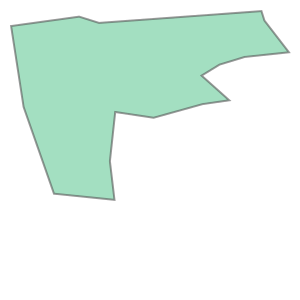

In [19]:
# Create a polygon
polygon = arcpy.Polygon(arcpy.Array([arcpy.Point(x, y) for x, y in coordinates]), spatial_ref)
polygon

In [21]:
# Create a feature class to store the polygon
output_fc = "cedeno_cedeno.shp"
arcpy.CreateFeatureclass_management("./", output_fc, "POLYGON", spatial_reference=spatial_ref)

<Result 'C:\\Users\\J.Paul\\Desktop\\EstudioDeCobertura\\MESES\\data_arcpy\\cedeno_cedeno.shp'>

In [22]:
# Insert the polygon into the feature class
with arcpy.da.InsertCursor(output_fc, ["SHAPE@"]) as cursor:cursor.insertRow([polygon])
    
print("Polygon created successfully in UTM Zone 17S!")

Polygon created successfully in UTM Zone 17S!
